In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')

In [8]:
df['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
crop            object
dtype: object

In [10]:
df['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

<Axes: >

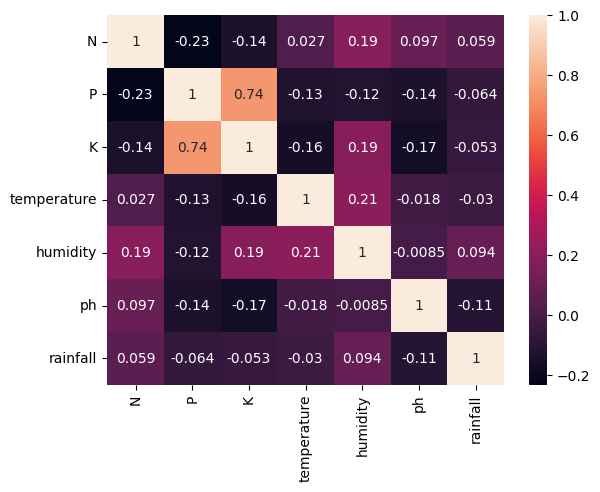

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
# Seperating features and target label
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['crop']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['crop']

In [13]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [15]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(Xtrain,Ytrain)

predicted_values = knn.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
   

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
score = cross_val_score(knn,features,target,cv=5)
cv_acc_knn = np.mean(score)
print('Cross validation score: ',score)
print('Cross validation score accuracy: ',cv_acc_knn)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]
Cross validation score accuracy:  0.9795454545454545


In [18]:
from sklearn.metrics import precision_recall_fscore_support
precision_knn,recall_knn,fscore_knn,support_knn = precision_recall_fscore_support(Ytest,predicted_values, average='macro')
print(precision_knn)
print(recall_knn)
print(fscore_knn)

0.9744917664035312
0.9755093225487962
0.9746198274548091


In [19]:
#Print Train Accuracy
knn_train_accuracy = knn.score(Xtrain,Ytrain)
print("knn_train_accuracy = ",knn.score(Xtrain,Ytrain))
#Print Test Accuracy
knn_test_accuracy = knn.score(Xtest,Ytest)
print("knn_test_accuracy = ",knn.score(Xtest,Ytest))

knn_train_accuracy =  0.9886363636363636
knn_test_accuracy =  0.975


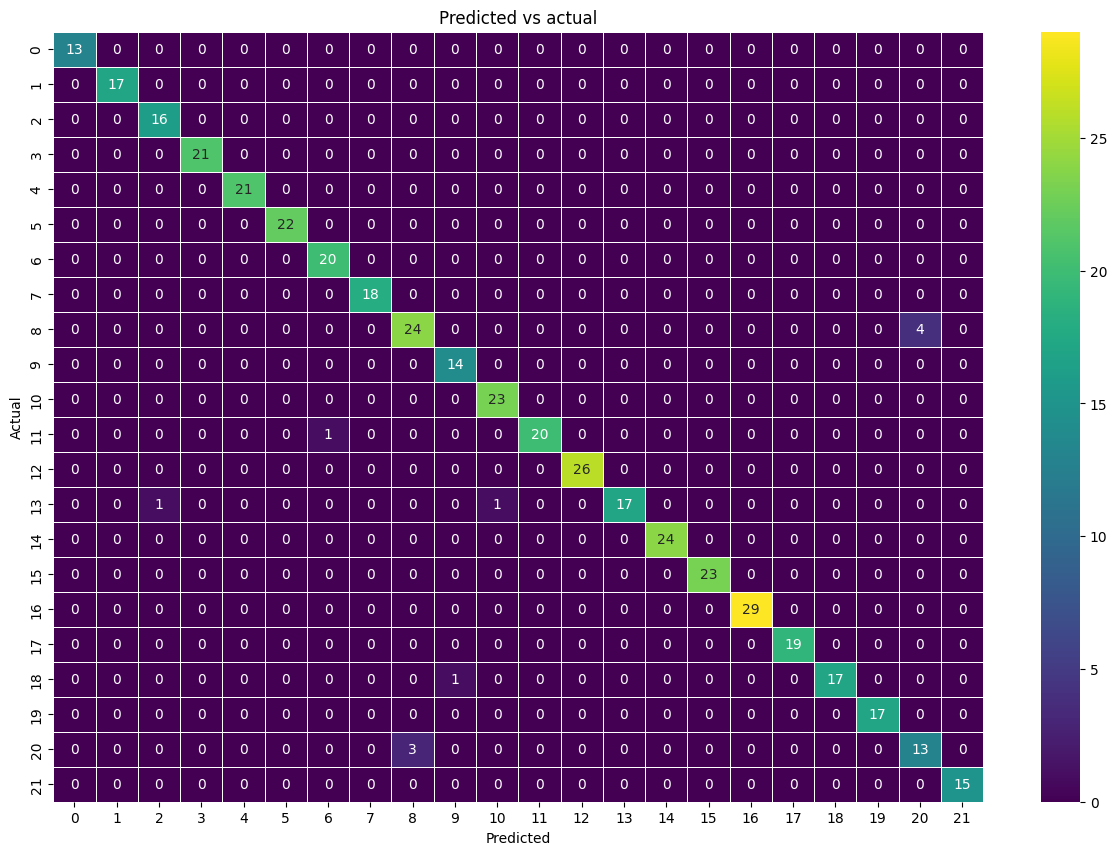

In [20]:
y_pred = knn.predict(Xtest)
y_true = Ytest

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

In [21]:
tp_knn = cm_knn[0,0]
fp_knn = cm_knn[0,1]
tn_knn = cm_knn[1,1]
fn_knn = cm_knn[1,0]
sensitivity_knn = tp_knn/(tp_knn+fn_knn)
print("Sensitivity: ",sensitivity_knn)
specificity_knn = tn_knn/(fp_knn+tn_knn)
print('Specificity : ', specificity_knn)

Sensitivity:  1.0
Specificity :  1.0


In [22]:
import pickle
# Dump the trained K-NN classifier with Pickle
KNN_pkl_filename = './models/KNNClassifier.pkl'
# Open the file to save as pkl file
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(knn, KNN_Model_pkl)
# Close the pickle instances
KNN_Model_pkl.close()

In [23]:
# Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [24]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
cv_acc_nb = np.mean(score)
print('Cross validation score: ',score)
print('Cross validation score accuracy: ',cv_acc_nb)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Cross validation score accuracy:  0.9950000000000001


In [25]:
from sklearn.metrics import precision_recall_fscore_support
precision_nb,recall_nb,fscore_nb,support_nb = precision_recall_fscore_support(Ytest,predicted_values, average='macro')
print(precision_nb)
print(recall_nb)
print(fscore_nb)

0.9943181818181818
0.9886363636363636
0.9904761904761905


In [26]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(Xtrain,Ytrain)
print("Training accuracy = ",NaiveBayes.score(Xtrain,Ytrain))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(Xtest,Ytest)
print("Testing accuracy = ",NaiveBayes.score(Xtest,Ytest))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


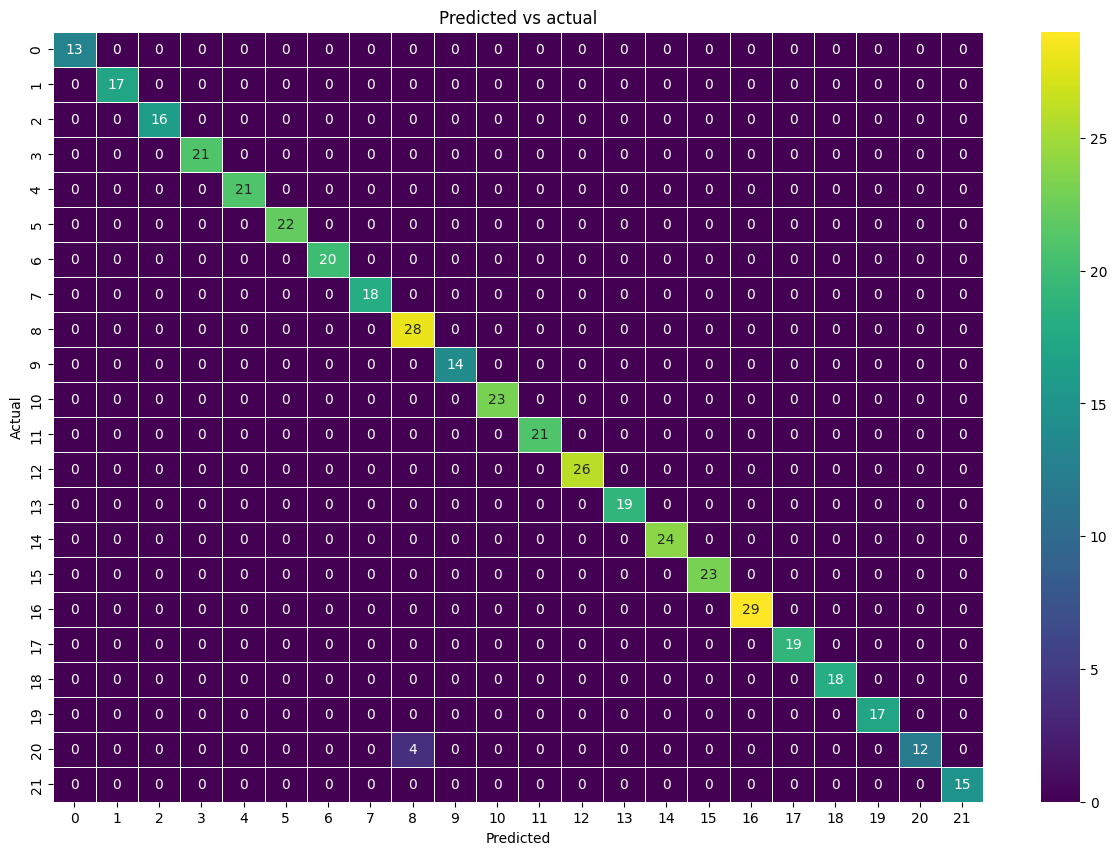

In [27]:
y_pred = NaiveBayes.predict(Xtest)
y_true = Ytest

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [28]:
tp_nb = cm_nb[0,0]
fp_nb = cm_nb[0,1]
tn_nb = cm_nb[1,1]
fn_nb = cm_nb[1,0]
sensitivity_nb = tp_nb/(tp_nb+fn_nb)
print("Sensitivity: ",sensitivity_nb)
specificity_nb = tn_nb/(fp_nb+tn_nb)
print('Specificity : ', specificity_nb)

Sensitivity:  1.0
Specificity :  1.0


In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = './models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [30]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
# data normalization with sklearn
# from sklearn.preprocessing import MinMaxScaler
# # fit scaler on training data
# norm = MinMaxScaler().fit(Xtrain)
# X_train_norm = norm.transform(Xtrain)
# # transform testing dataabs
# X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1,probability=True)
# SVM.fit(X_train_norm,Ytrain)
SVM.fit(Xtrain,Ytrain)
# predicted_values = SVM.predict(X_test_norm)
predicted_values = SVM.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.89      0.88        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
 

In [31]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
cv_acc_svm = np.mean(score)
print('Cross validation score: ',score)
print('Cross validation score accuracy: ',cv_acc_svm)

Cross validation score:  [0.97954545 0.975      0.98863636 0.98863636 0.98181818]
Cross validation score accuracy:  0.9827272727272728


In [32]:
from sklearn.metrics import precision_recall_fscore_support
precision_svm,recall_svm,fscore_svm,support_svm = precision_recall_fscore_support(Ytest,predicted_values, average='macro')
print(precision_svm)
print(recall_svm)
print(fscore_svm)

0.9748769570524135
0.9742917900812637
0.9742007579201352


In [33]:
#Print Train Accuracy
svm_train_accuracy = SVM.score(Xtrain,Ytrain)
print("Training accuracy = ",SVM.score(Xtrain,Ytrain))
#Print Test Accuracy
svm_test_accuracy = SVM.score(Xtest,Ytest)
print("Testing accuracy = ",SVM.score(Xtest,Ytest))

Training accuracy =  0.9892045454545455
Testing accuracy =  0.975


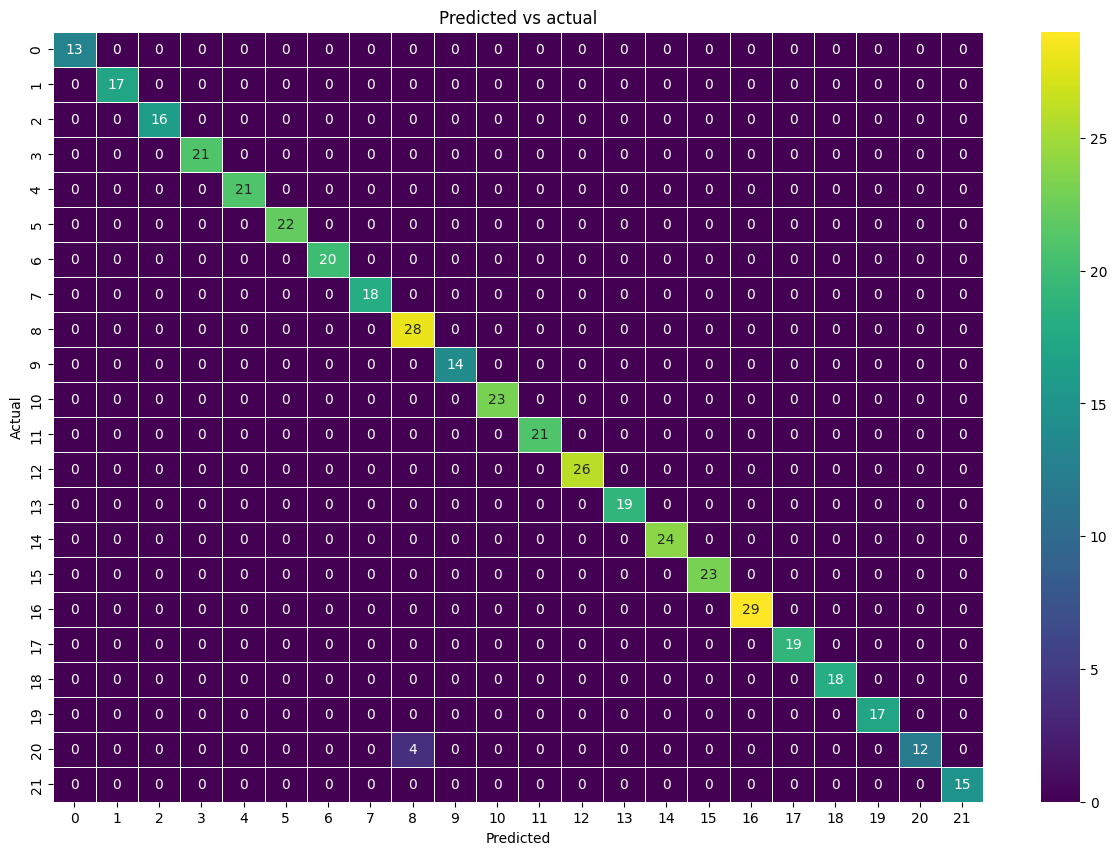

In [34]:
y_pred = SVM.predict(Xtest)
y_true = Ytest

from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [35]:
tp_svm = cm_svm[0,0]
fp_svm = cm_svm[0,1]
tn_svm = cm_svm[1,1]
fn_svm = cm_svm[1,0]
sensitivity_svm = tp_svm/(tp_svm+fn_svm)
print("Sensitivity: ",sensitivity_svm)
specificity_svm = tn_svm/(fp_svm+tn_svm)
print('Specificity : ', specificity_svm)

Sensitivity:  1.0
Specificity :  1.0


In [36]:
#Saving trained SVM model
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = './models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

In [37]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [38]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
cv_acc_rf = np.mean(score)
print('Cross validation score: ',score)
print('Cross validation score accuracy: ',cv_acc_rf)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]
Cross validation score accuracy:  0.9945454545454545


In [39]:
precision_rf,recall_rf,fscore_rf,support_rf = precision_recall_fscore_support(Ytest,predicted_values, average='macro')
print(precision_rf)
print(recall_rf)
print(fscore_rf)

0.992927376229084
0.989084928229665
0.9903806458718525


In [40]:
#Print Train Accuracy
rf_train_accuracy = RF.score(Xtrain,Ytrain)
print("Training accuracy = ",RF.score(Xtrain,Ytrain))
#Print Test Accuracy
rf_test_accuracy = RF.score(Xtest,Ytest)
print("Testing accuracy = ",RF.score(Xtest,Ytest))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


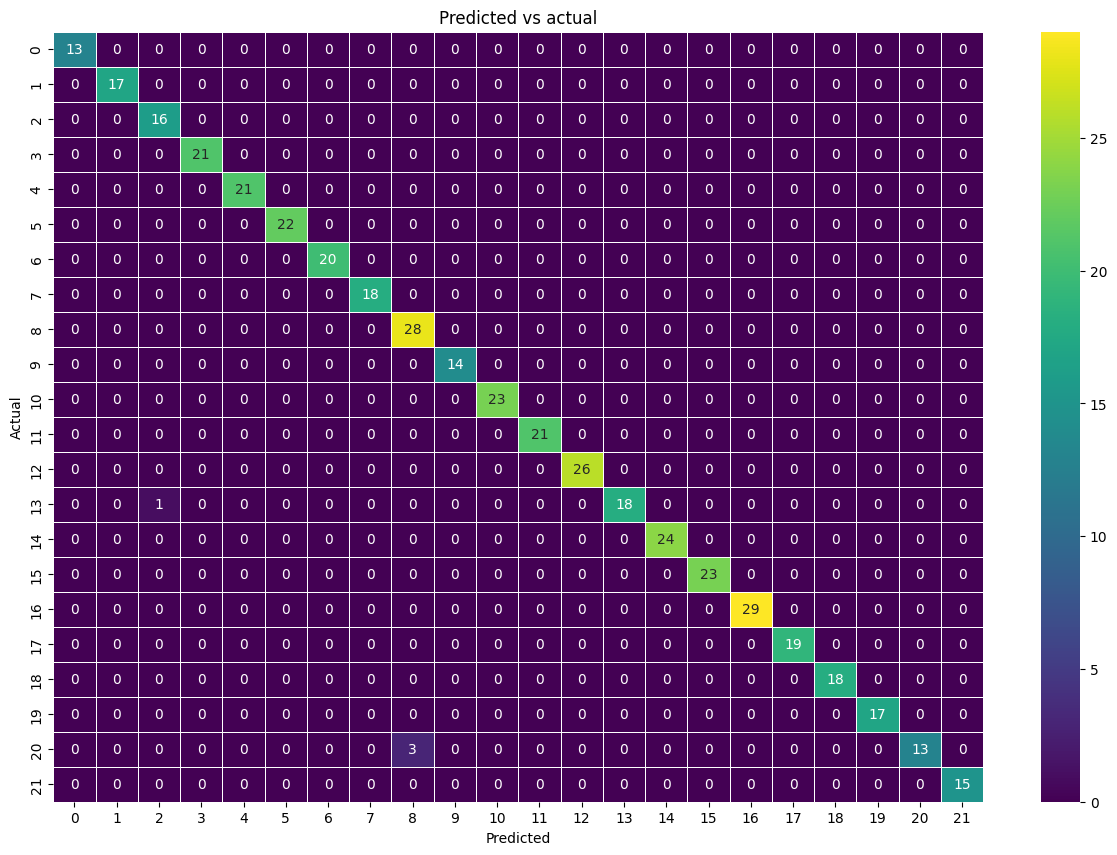

In [41]:
y_pred = RF.predict(Xtest)
y_true = Ytest

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [42]:
tp_rf = cm_rf[0,0]
fp_rf = cm_rf[0,1]
tn_rf = cm_rf[1,1]
fn_rf = cm_rf[1,0]
sensitivity_rf = tp_rf/(tp_rf+fn_rf)
print("Sensitivity: ",sensitivity_rf)
specificity_rf = tn_rf/(fp_rf+tn_rf)
print('Specificity : ', specificity_rf)

Sensitivity:  1.0
Specificity :  1.0


In [43]:
# Saving trained Random Forest model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = './models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [44]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import VotingClassifier

In [45]:
''' the ensemble classifier is using the VotingClassifier from scikit-learn library. The voting parameter is set to 'soft', which uses the predicted class probabilities to weight the vote. Also, the estimators are passed as a list of tuples, where the first element of each tuple is a string that gives a name to the classifier, and the second element is the classifier object.'''
# creating ensemble classifier
ensemble = VotingClassifier(estimators=[('KNeighbours',knn),('Naive Bayes', NaiveBayes),('SVM',SVM),('Random Forest', RF)], voting='soft')
# fit ensemble to training data
ensemble.fit(Xtrain,Ytrain)

VotingClassifier(estimators=[('KNeighbours', KNeighborsClassifier()),
                             ('Naive Bayes', GaussianNB()),
                             ('SVM', SVC(C=1, kernel='poly', probability=True)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=20,
                                                     random_state=0))],
                 voting='soft')

In [46]:
# using ensemble to predict
predicted_values = ensemble.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Ensemble')
print("Ensemble's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Ensemble's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [47]:
# Cross validation score (ensemble)
score = cross_val_score(ensemble,features,target,cv=5)
cv_acc_en = np.mean(score)
print('Cross validation score: ',score)
print('Cross validation score accuracy: ',cv_acc_en)

Cross validation score:  [0.99772727 0.99318182 0.99545455 0.99545455 0.98636364]
Cross validation score accuracy:  0.9936363636363638


In [48]:
precision_en,recall_en,fscore_en,support_en = precision_recall_fscore_support(Ytest,predicted_values, average='macro')
print(precision_en)
print(recall_en)
print(fscore_en)

0.9943181818181818
0.9886363636363636
0.9904761904761905


In [49]:
#Print Train Accuracy
en_train_accuracy = ensemble.score(Xtrain,Ytrain)
print("Training accuracy = ",ensemble.score(Xtrain,Ytrain))
#Print Test Accuracy
en_test_accuracy = ensemble.score(Xtest,Ytest)
print("Testing accuracy = ",ensemble.score(Xtest,Ytest))

Training accuracy =  0.9977272727272727
Testing accuracy =  0.990909090909091


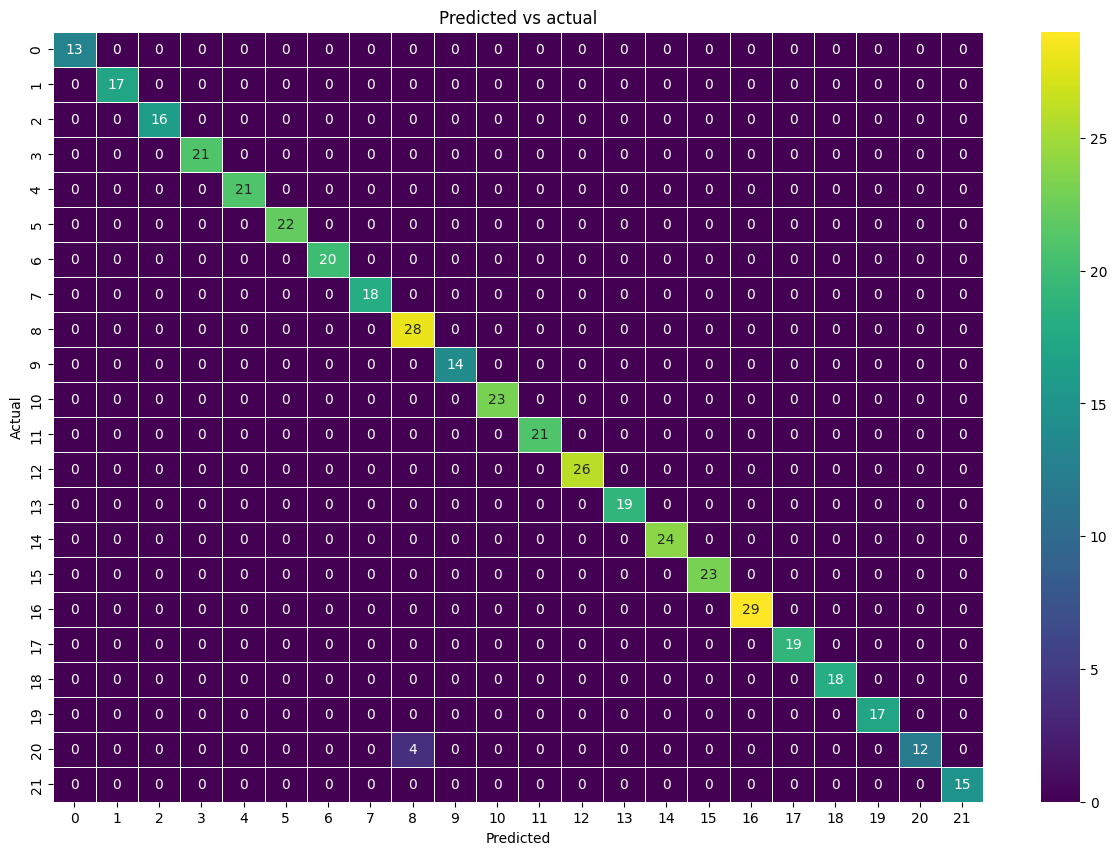

In [50]:
y_pred = ensemble.predict(Xtest)
y_true = Ytest

from sklearn.metrics import confusion_matrix

cm_en = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_en, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [51]:
tp_en = cm_en[0,0]
fp_en = cm_en[0,1]
tn_en = cm_en[1,1]
fn_en = cm_en[1,0]
sensitivity_en = tp_en/(tp_en+fn_en)
print("Sensitivity: ",sensitivity_en)
specificity_en = tn_en/(fp_en+tn_en)
print('Specificity : ', specificity_en)

Sensitivity:  1.0
Specificity :  1.0


In [52]:
# Saving trained Ensemble model
import pickle
# Dump the trained Ensemble classifier with Pickle
EN_pkl_filename = './models/Ensemble.pkl'
# Open the file to save as pkl file
EN_Model_pkl = open(EN_pkl_filename, 'wb')
pickle.dump(ensemble, EN_Model_pkl)
# Close the pickle instances
EN_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

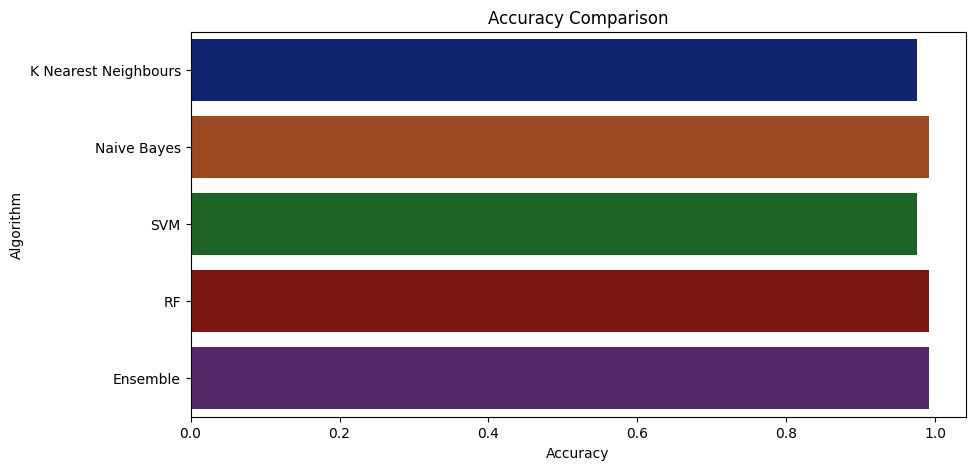

In [53]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

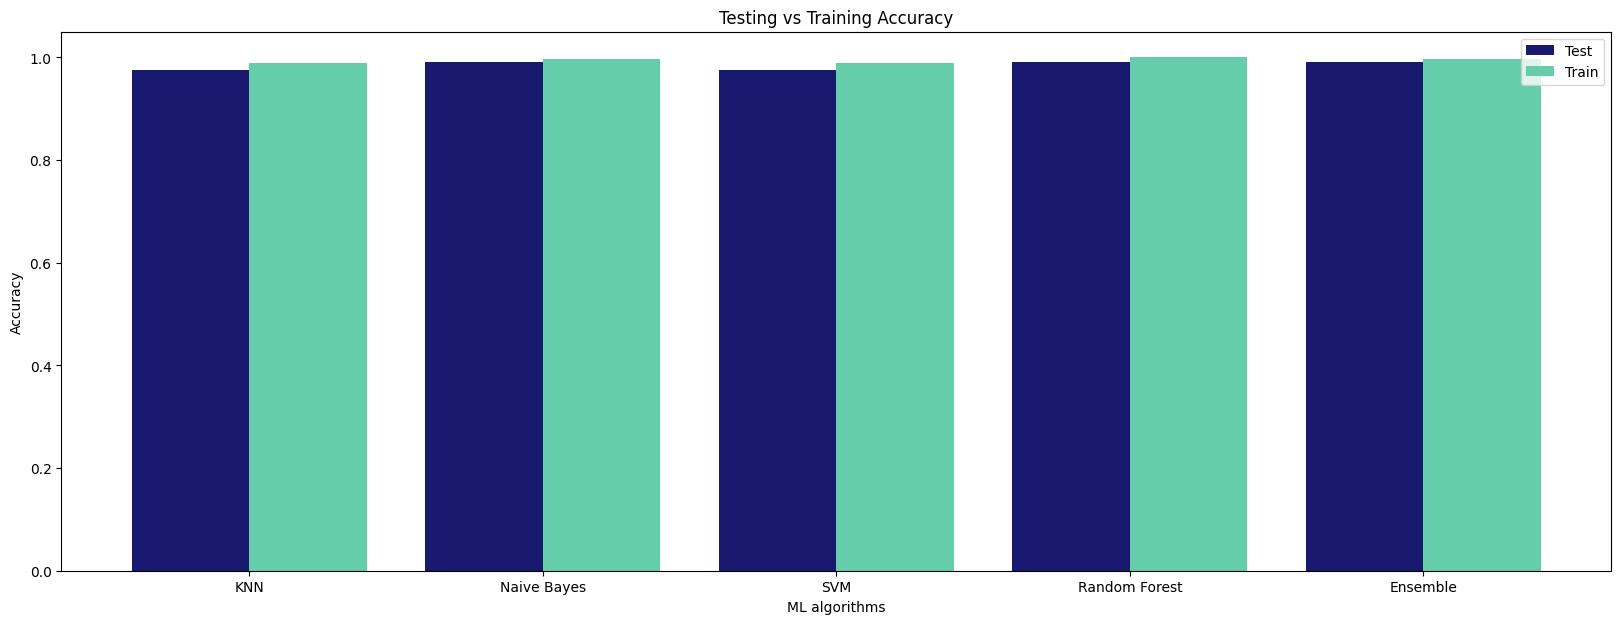

In [54]:
label = ['KNN','Naive Bayes','SVM','Random Forest','Ensemble']
Test = [knn_test_accuracy, nb_test_accuracy,svm_test_accuracy,rf_test_accuracy,en_test_accuracy]
Train = [knn_train_accuracy,  nb_train_accuracy, svm_train_accuracy,rf_train_accuracy,en_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

In [55]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

K Nearest Neighbours --> 0.975
Naive Bayes --> 0.990909090909091
SVM --> 0.975
RF --> 0.990909090909091
Ensemble --> 0.990909090909091


In [56]:
# Measuring the Error
models = [('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, knn_train_accuracy, knn_test_accuracy, cv_acc_knn,sensitivity_knn,specificity_knn,precision_knn,recall_knn,fscore_knn),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, nb_train_accuracy, nb_test_accuracy, cv_acc_nb,sensitivity_nb,specificity_nb,precision_nb,recall_nb,fscore_nb),
          ('SVM', tp_svm, fp_svm, tn_svm, fn_svm, svm_train_accuracy, svm_test_accuracy, cv_acc_svm,sensitivity_svm,specificity_svm,precision_svm,recall_svm,fscore_svm),
          ('Random Forest', tp_rf, fp_rf, tn_rf, fn_rf, rf_train_accuracy, rf_test_accuracy, cv_acc_rf,sensitivity_rf,specificity_rf,precision_rf,recall_rf,fscore_rf),
          ('Ensemble', tp_en, fp_en, tn_en, fn_en, en_train_accuracy, en_test_accuracy, cv_acc_en,sensitivity_en,specificity_en,precision_en,recall_en,fscore_en)
         ]

In [57]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation','Sensitivity','Specificity','Precision','Recall','F1 Score'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation,Sensitivity,Specificity,Precision,Recall,F1 Score
0,K-Nearest Neighbors (KNN),13,0,17,0,0.988636,0.975000,0.979545,1.0,1.0,0.974492,0.975509,0.974620
1,Naive Bayes,13,0,17,0,0.996023,0.990909,0.995000,1.0,1.0,0.994318,0.988636,0.990476
2,SVM,13,0,17,0,0.989205,0.975000,0.982727,1.0,1.0,0.974877,0.974292,0.974201
3,Random Forest,13,0,17,0,1.000000,0.990909,0.994545,1.0,1.0,0.992927,0.989085,0.990381
4,Ensemble,13,0,17,0,0.997727,0.990909,0.993636,1.0,1.0,0.994318,0.988636,0.990476


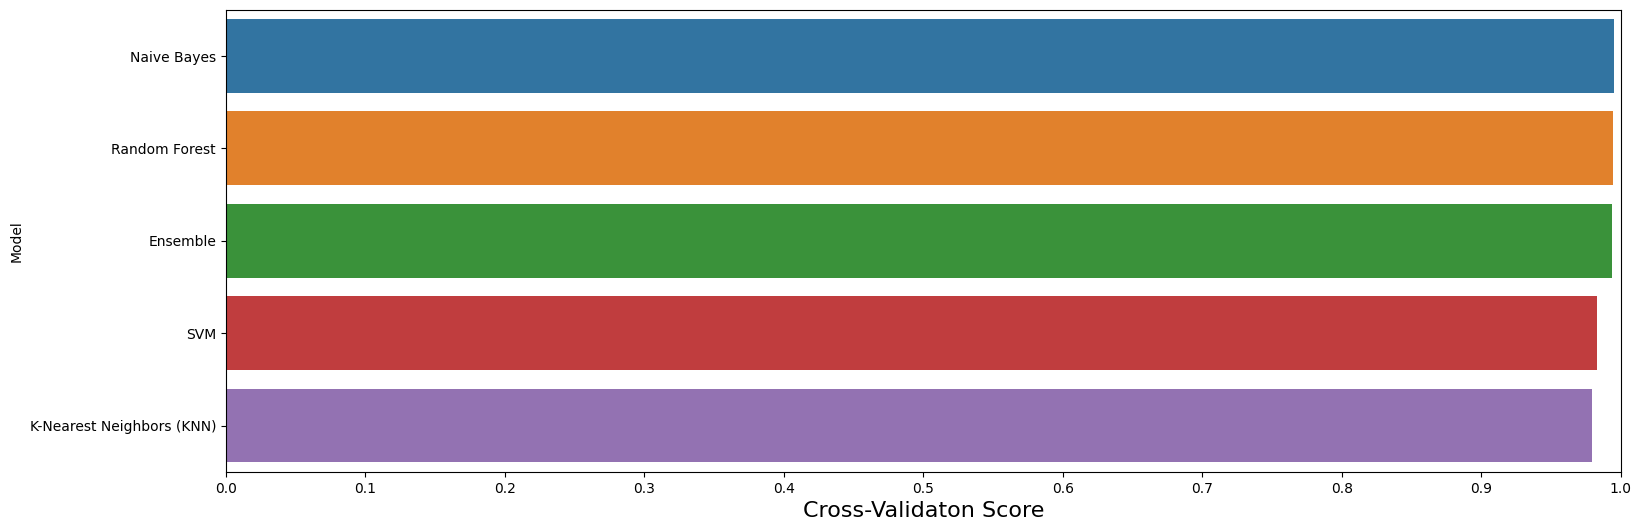

In [58]:
# Visualizing Model Performance
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

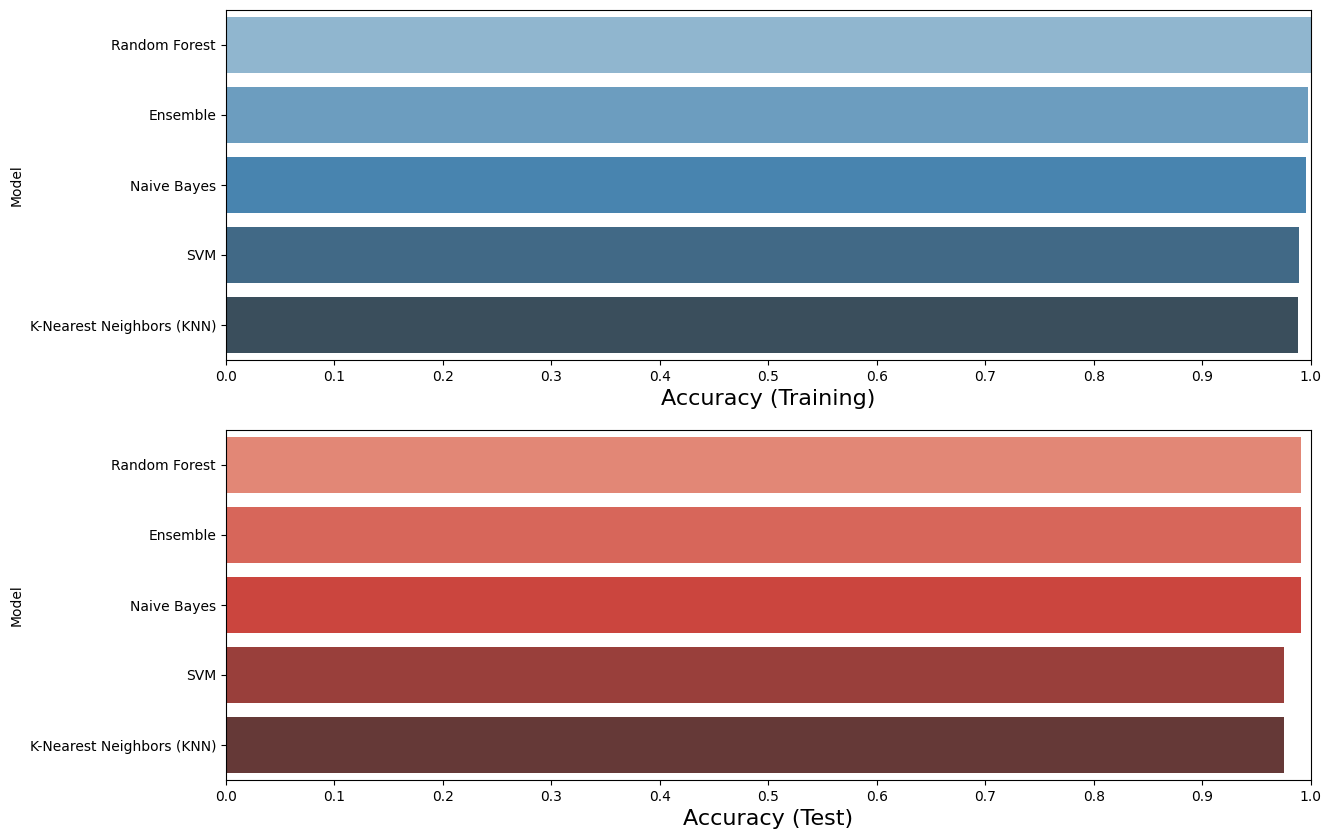

In [59]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [60]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [61]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [62]:
sample=ensemble.predict([[10,55,23,21.18853178,19.63438599,5.728233081,137.1948633]])
print("Sample outcome: ",sample)

Sample outcome:  ['kidneybeans']
